# Question 2

## part 1

In [811]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [812]:
df = pd.read_csv('energydata_complete.csv')

In [813]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097


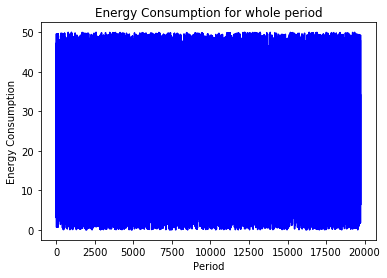

In [814]:
df = df.reset_index()
fig, ax = plt.subplots()
ax.plot(df['index'], df['Energy Consumption'], 'b-', label='Energy Consumption Plot')
plt.xlabel('Period')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for whole period')

In [815]:
df1 = df.iloc[42:1050,:]

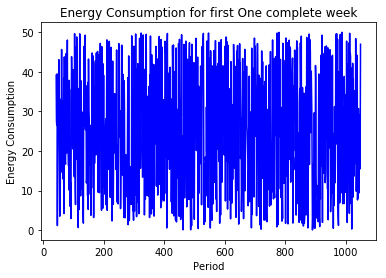

In [816]:
fig, ax = plt.subplots()
ax.plot(df1['index'], df1['Energy Consumption'], 'b-', label='Energy Consumption Plot')
plt.xlabel('Period')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for first One complete week')

## part 2

In [817]:
df['date1'] = df['date'].str.partition(' ')[0]
df['time'] = df['date'].str.partition(' ')[2]
df['hours'] = df['time'].str.partition(':')[0]
df['mins'] = df['time'].str.partition(':')[2]
df['timevar'] = df['date1'] + '/' + df['hours']

In [818]:
#df.head()

In [819]:
dfnew = df[['timevar', 'mins', 'Energy Consumption']]

In [820]:
dfnew.head()

,timevar,mins,Energy Consumption
0,1/11/2016/17,00,13.275433
1,1/11/2016/17,10,18.606195
2,1/11/2016/17,20,28.642668
3,1/11/2016/17,30,45.410390
4,1/11/2016/17,40,10.084097


In [821]:
dfnew = dfnew.set_index(['timevar', 'mins'])

In [822]:
#dfnew.head(10)

In [823]:
dfnew = dfnew.unstack()

In [824]:
dfnew.head()

Energy Consumption                                              \
mins                         00         10         20         30         40   
timevar                                                                       
1/11/2016/17          13.275433  18.606195  28.642668  45.410390  10.084097   
1/11/2016/18          47.233763  33.039890  31.455702   3.089314  10.298729   
1/11/2016/19          34.351142  19.205186  38.492071  24.884962  35.880925   
1/11/2016/20          19.001759  38.872261  46.735262  10.607126  32.583688   
1/11/2016/21          13.361033  19.305705   0.669517  19.119398  43.484542   

                         
mins                 50  
timevar                  
1/11/2016/17  44.919484  
1/11/2016/18   8.827838  
1/11/2016/19  49.595305  
1/11/2016/20   6.277755  
1/11/2016/21  17.017450

In [825]:
dfnew['hourly energy consumption'] = dfnew.sum(axis=1)

In [826]:
dfnew = dfnew.reset_index()

In [827]:
dfnew['date'] = dfnew['timevar'].str.rpartition('/')[0]

In [828]:
dfnew.head()

timevar Energy Consumption                                   \
mins                               00         10         20         30   
0     1/11/2016/17          13.275433  18.606195  28.642668  45.410390   
1     1/11/2016/18          47.233763  33.039890  31.455702   3.089314   
2     1/11/2016/19          34.351142  19.205186  38.492071  24.884962   
3     1/11/2016/20          19.001759  38.872261  46.735262  10.607126   
4     1/11/2016/21          13.361033  19.305705   0.669517  19.119398   

                           hourly energy consumption       date  
mins         40         50                                       
0     10.084097  44.919484                160.938267  1/11/2016  
1     10.298729   8.827838                133.945235  1/11/2016  
2     35.880925  49.595305                202.409591  1/11/2016  
3     32.583688   6.277755                154.077851  1/11/2016  
4     43.484542  17.017450                112.957645  1/11/2016

In [829]:
dfnew['m'] = (dfnew['date'].str.partition('/')[0]).astype(int)
dfnew['d'] = ((dfnew['date'].str.partition('/')[2]).str.partition('/')[0]).astype(int)
dfnew['y'] = (dfnew['date'].str.rpartition('/')[2]).astype(int)
dfnew['Hours'] = (dfnew['timevar'].str.rpartition('/')[2]).astype(int)

In [830]:
dfnew.head()

timevar Energy Consumption                                   \
mins                               00         10         20         30   
0     1/11/2016/17          13.275433  18.606195  28.642668  45.410390   
1     1/11/2016/18          47.233763  33.039890  31.455702   3.089314   
2     1/11/2016/19          34.351142  19.205186  38.492071  24.884962   
3     1/11/2016/20          19.001759  38.872261  46.735262  10.607126   
4     1/11/2016/21          13.361033  19.305705   0.669517  19.119398   

                           hourly energy consumption       date  m   d     y  \
mins         40         50                                                     
0     10.084097  44.919484                160.938267  1/11/2016  1  11  2016   
1     10.298729   8.827838                133.945235  1/11/2016  1  11  2016   
2     35.880925  49.595305                202.409591  1/11/2016  1  11  2016   
3     32.583688   6.277755                154.077851  1/11/2016  1  11  2016   
4     43.484542  17.017450                112.957645  1/11/2016  1  11  2016   

     Hours  
mins        
0       17  
1       18  
2       19  
3       20  
4       21

In [831]:
dfnew['y1'] = np.where(dfnew['m'] < 3, dfnew['y'] - 1, dfnew['y'])
dfnew['a'] = ( 23*dfnew['m']//9 + dfnew['d'] + 4 + dfnew['y'] + dfnew['y1']//4 - dfnew['y1']//100 + dfnew['y1']//400 )
dfnew['b'] = np.where(dfnew['m'] >= 3, dfnew['a'] - 2, dfnew['a'])
dfnew['Weekday'] = dfnew['b'] % 7

In [832]:
dict_day = {0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'}

In [833]:
dfnew['Day']=dfnew['Weekday'].apply(lambda x: dict_day[x])

In [834]:
dfa = dfnew[['date', 'Weekday', 'Hours', 'Day', 'hourly energy consumption']]

In [835]:
dfa.head(10)

,date,Weekday,Hours,Day,hourly energy consumption
mins,,,,,
0,1/11/2016,1,17,Monday,160.938267
1,1/11/2016,1,18,Monday,133.945235
2,1/11/2016,1,19,Monday,202.409591
3,1/11/2016,1,20,Monday,154.077851
4,1/11/2016,1,21,Monday,112.957645
5,1/11/2016,1,22,Monday,162.862245
6,1/11/2016,1,23,Monday,175.258768
7,1/12/2016,2,0,Tuesday,157.780308
8,1/12/2016,2,1,Tuesday,172.338439


In [836]:
df2 = dfa.iloc[7:175,:]

In [837]:
#df2.head(40)

In [838]:
df2 = df2.sort_values(by = ['Hours', 'Weekday'], ascending = [True, True])

In [839]:
#df2

In [840]:
df3 = df2[['Hours', 'Weekday', 'hourly energy consumption']]

In [841]:
#df3

In [842]:
df3 = df3.pivot('Hours', 'Weekday', 'hourly energy consumption')

In [843]:
df3

Weekday,0,1,2,3,4,5,6
Hours,,,,,,,
0,135.412251,81.781133,157.780308,203.731116,146.612412,142.361979,121.214506
1,194.740494,104.895388,172.338439,142.642426,165.881296,190.132971,163.032425
2,152.659262,195.465785,103.694322,118.635797,125.647159,108.259205,156.942059
3,192.553042,182.971544,145.341347,118.299357,142.370709,113.349697,136.322848
4,82.506704,176.734190,169.146873,194.983342,177.620645,173.263131,152.229580
5,159.186919,184.745814,165.166851,166.228740,149.020639,199.137883,195.020820
6,188.202003,138.167565,180.522969,128.565179,146.791379,149.058804,153.171648
7,130.783316,175.982845,109.069272,137.821893,149.965382,184.972615,139.846486
8,149.385049,121.243731,169.667238,160.318264,164.960343,167.811092,172.205580


In [844]:
df3 = df3.rename(index = str, columns = {0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})

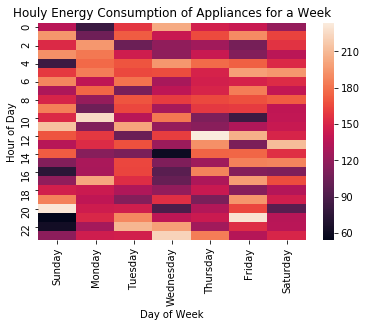

In [845]:
import seaborn as sns
sns.heatmap(df3)
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Houly Energy Consumption of Appliances for a Week')

## part 3

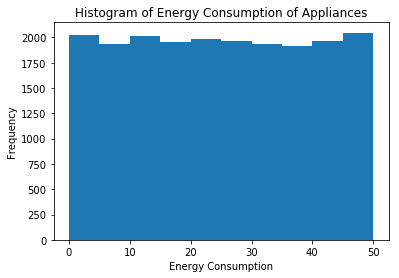

In [846]:
plt.hist(df['Energy Consumption'])
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')

## part 4

In [847]:
#df.head()

In [848]:
df['hours'] = df['hours'].astype(int)
df['mins'] = df['mins'].astype(int)

In [849]:
df['NSM'] = (24*3600) - (df['hours'])*3600 - (df['mins'])*60

In [850]:
df.head()

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,Windspeed,Visibility,Tdewpoint,Energy Consumption,date1,time,hours,mins,timevar,NSM
0,0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,7.000000,63.000000,5.3,13.275433,1/11/2016,17:00,17,0,1/11/2016/17,25200
1,1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,6.666667,59.166667,5.2,18.606195,1/11/2016,17:10,17,10,1/11/2016/17,24600
2,2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,6.333333,55.333333,5.1,28.642668,1/11/2016,17:20,17,20,1/11/2016/17,24000
3,3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,6.000000,51.500000,5.0,45.410390,1/11/2016,17:30,17,30,1/11/2016/17,23400
4,4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,5.666667,47.666667,4.9,10.084097,1/11/2016,17:40,17,40,1/11/2016/17,22800


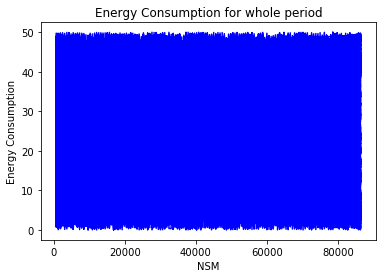

In [851]:
fig, ax = plt.subplots()
ax.plot(df['NSM'], df['Energy Consumption'], 'b-', label='Energy Consumption Plot')
plt.xlabel('NSM')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for whole period')

## part 5

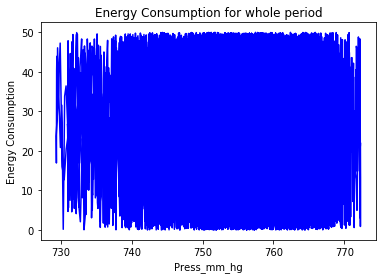

In [852]:
fig, ax = plt.subplots()
ax.plot(df['Press_mm_hg'], df['Energy Consumption'], 'b-', label='Energy Consumption Plot')
plt.xlabel('Press_mm_hg')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for whole period')

## part 6

In [853]:
dff = df.drop(['index', 'date', 'date1', 'time', 'hours', 'mins', 'timevar'], axis = 1)

In [854]:
#dff.dtypes

In [855]:
cols = dff.columns.tolist()
cols = [cols[-1]] + cols[:-2] + [cols[-2]]
dff = dff[cols]

In [856]:
dff.head()

,NSM,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,25200,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,24600,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,24000,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,23400,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390
4,22800,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097


In [857]:
X = dff.iloc[:,:-1]
y = dff.iloc[:, -1]

In [858]:
#y

In [859]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [860]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [861]:
from sklearn.metrics import mean_squared_error

In [862]:
print('Coefficients: \n', LR.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [  2.35260352e-06  -1.33088515e-03   1.17193920e-02   2.67473290e-01
   1.31733166e-01  -3.47334742e-01  -1.94905493e-01  -1.20805865e-01
   6.84979022e-02   2.12398743e-01   1.15747850e-01  -2.48690560e-01
  -1.74827088e-02   1.39108126e-02  -5.69229268e-03   4.76284731e-02
  -2.10143574e-02  -1.52668980e-01   5.80257455e-02   3.61954292e-01
  -1.23429481e-01  -2.54379905e-02   1.92800494e-02   2.80639359e-02
  -1.86679101e-03  -8.22197152e-03  -3.62026201e-02]
Mean squared error: 209.89


Coefficient of Press_mm_hg is high (5th last), however coefficient of NSM (1st) is low. It is inferred that Press_mm_hg is significantly contributing but NSM doesn't.